In [1]:
#requirements
!pip install pandas
!pip install factor_analyzer
!pip install pingouin
!pip install seaborn
!pip install numpy
!pip install matplotlib
!pip install scipy
!pip install factor_analyzer
!pip install pingouin

  Using cached factor_analyzer-0.5.0-py2.py3-none-any.whl
  Using cached pre_commit-3.6.0-py2.py3-none-any.whl (204 kB)
  Using cached cfgv-3.4.0-py2.py3-none-any.whl (7.2 kB)
  Using cached identify-2.5.33-py2.py3-none-any.whl (98 kB)
  Using cached nodeenv-1.8.0-py2.py3-none-any.whl (22 kB)
  Using cached virtualenv-20.25.0-py3-none-any.whl (3.8 MB)
  Using cached distlib-0.3.7-py2.py3-none-any.whl (468 kB)
  Using cached pingouin-0.5.3-py3-none-any.whl (198 kB)
  Using cached pandas_flavor-0.6.0-py3-none-any.whl (7.2 kB)
  Using cached outdated-0.2.2-py2.py3-none-any.whl (7.5 kB)
  Using cached littleutils-0.2.2.tar.gz (6.6 kB)
  Preparing metadata (setup.py) ... done
  Created wheel for littleutils: filename=littleutils-0.2.2-py3-none-any.whl size=7026 sha256=1578f3c6962aa5218eafa64d38173f38ed7ce463a6b5fe291f681abf54628bca
  Stored in directory: /root/.cache/pip/wheels/3d/fe/b0/27a9892da57472e538c7452a721a9cf463cc03cf7379889266
Successfully built littleutils


In [3]:
#Libraries
import pandas as pd
from factor_analyzer import FactorAnalyzer
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
import pingouin as pg
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt


In [4]:
# Dataset
grades = pd.read_excel("Factor_Grades.xlsx")

In [5]:
print(grades)

      estudante  finanças  custos  marketing  atuária
0      Gabriela       5.8     4.0        1.0      6.0
1   Luiz Felipe       3.1     3.0       10.0      2.0
2      Patrícia       3.1     4.0        4.0      4.0
3       Gustavo      10.0     8.0        8.0      8.0
4       Letícia       3.4     2.0        3.2      3.2
..          ...       ...     ...        ...      ...
95       Sheila       7.7     4.3        5.2      5.1
96        Pedro       9.0     6.0        4.0      9.8
97      Horácio       9.3     6.0        7.0      7.0
98      Leandro       9.0     6.5        3.0      9.0
99       Estela       8.9     5.0        2.0      8.0

[100 rows x 5 columns]


In [7]:
# Some basic informations
print(grades.info())
print(grades.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   estudante  100 non-null    object 
 1   finanças   100 non-null    float64
 2   custos     100 non-null    float64
 3   marketing  100 non-null    float64
 4   atuária    100 non-null    float64
dtypes: float64(4), object(1)
memory usage: 4.0+ KB
None
         finanças      custos   marketing     atuária
count  100.000000  100.000000  100.000000  100.000000
mean     5.834000    4.717000    5.668000    5.314000
std      3.122749    2.455999    2.828351    2.513078
min      0.600000    1.900000    1.000000    1.700000
25%      3.100000    2.900000    3.000000    3.200000
50%      5.800000    4.000000    6.000000    5.000000
75%      9.000000    6.000000    8.000000    7.025000
max     10.000000   10.000000   10.000000   10.000000


In [9]:
#Quantitative variables (useful) to our analysis
grades_pca = grades[["finanças","custos", "marketing", "atuária"]]
print(grades_pca)

    finanças  custos  marketing  atuária
0        5.8     4.0        1.0      6.0
1        3.1     3.0       10.0      2.0
2        3.1     4.0        4.0      4.0
3       10.0     8.0        8.0      8.0
4        3.4     2.0        3.2      3.2
..       ...     ...        ...      ...
95       7.7     4.3        5.2      5.1
96       9.0     6.0        4.0      9.8
97       9.3     6.0        7.0      7.0
98       9.0     6.5        3.0      9.0
99       8.9     5.0        2.0      8.0

[100 rows x 4 columns]


In [10]:
# Correlation matrix
matrix_corr = pg.rcorr(grades_pca,method="pearson",
                       upper = "pval", decimals=4, pval_stars={0.01:"***", 0.05:"**", 0.10: "*"})
print(matrix_corr)

          finanças  custos marketing atuária
finanças         -     ***               ***
custos      0.7556       -               ***
marketing  -0.0295  0.0029         -        
atuária     0.7109  0.8081   -0.0443       -


<ipython-input-11-2b0d13d69b5a>:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(grades.corr(),mask=mask, vmax=1, vmin=-.25,center=0,


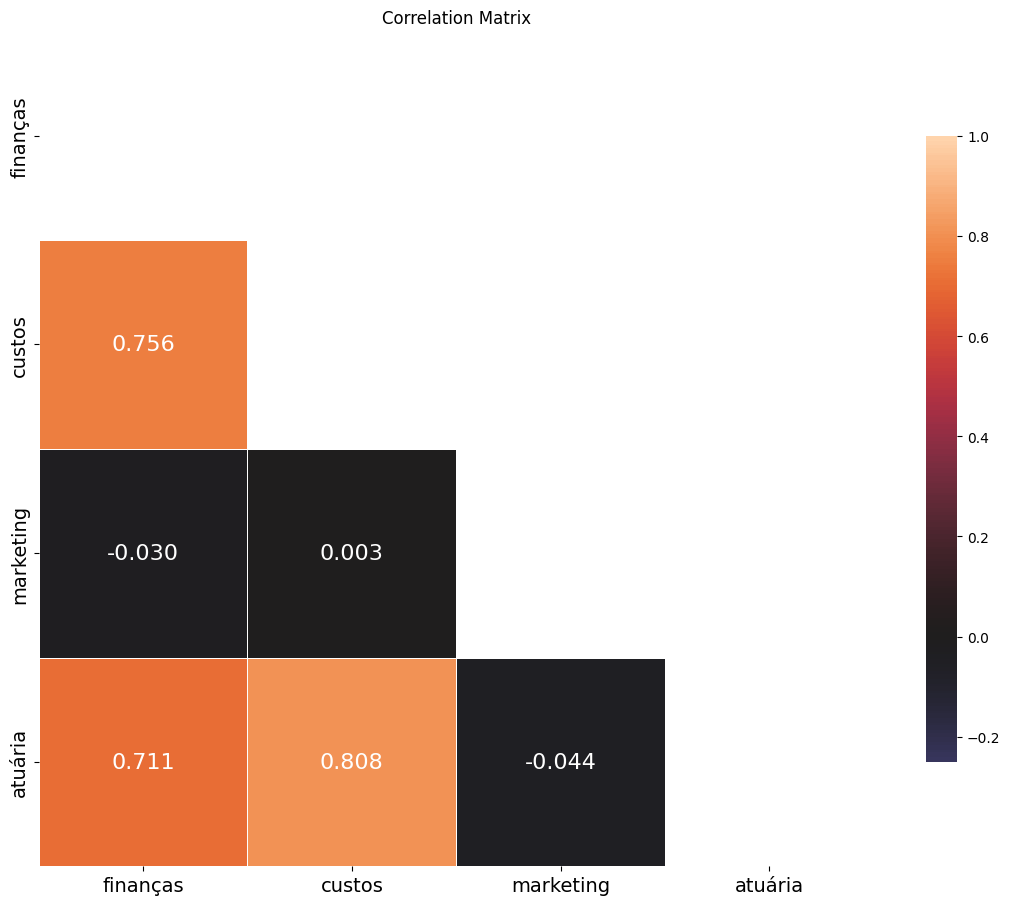

In [11]:
#Correlation matrix
corr = grades_pca.corr()
f,ax = plt.subplots(figsize=(11,9))
mask = np.triu(np.ones_like(corr,dtype=bool))
cmap = sns.diverging_palette(230,20,n=256, as_cmap=True)
sns.heatmap(grades.corr(),mask=mask, vmax=1, vmin=-.25,center=0,
            square=True, linewidths=.5,annot=True, fmt=".3f",
            annot_kws={"size":16},
            cbar_kws = {"shrink":.75})
plt.title("Correlation Matrix")
plt.tight_layout()
ax.tick_params(axis="x",labelsize=14)
ax.tick_params(axis="y",labelsize=14)
ax.set_ylim(len(corr))
plt.show()

In [13]:
#Bartlett test of sphericity
bartlett, p_value = calculate_bartlett_sphericity(grades_pca)
print(f'Bartlett statistic: {bartlett}')

print(f'p-value : {p_value}')

Bartlett statistic: 191.87909970380863
p-value : 1.0139139940945954e-38


In [15]:
#PCA
fa = FactorAnalyzer()
fa.fit(grades_pca)

FactorAnalyzer(rotation_kwargs={})

In [16]:
#Eigenvalues
eigen, v = fa.get_eigenvalues()
print(eigen)

[2.51812681 1.0003793  0.29761585 0.18387804]


In [17]:
# Kaiser criterium
fa.set_params(n_factors=2, method="principal", rotation = None)
fa.fit(grades_pca)

FactorAnalyzer(method='principal', n_factors=2, rotation=None,
               rotation_kwargs={})

In [18]:
#Eigenvalues, variances and cumulative variance
eigen_factors = fa.get_factor_variance()
eigen_factors

(array([2.51812681, 1.0003793 ]),
 array([0.6295317 , 0.25009482]),
 array([0.6295317 , 0.87962653]))

In [19]:
table_eigen = pd.DataFrame(eigen_factors)
table_eigen.columns = [f"Factor {i+1}" for i, v in enumerate(table_eigen.columns)]
table_eigen.index = ['Eigenvalue','Variance', 'Cum. Variance']
table_eigen = table_eigen.T
print(table_eigen)


          Eigenvalue  Variance  Cum. Variance
Factor 1    2.518127  0.629532       0.629532
Factor 2    1.000379  0.250095       0.879627


In [20]:
# Loadings
loadings = fa.loadings_

table_loadings = pd.DataFrame(loadings)
table_loadings.columns = [f"Factor {i+1}" for i, v in enumerate(table_loadings.columns)]
table_loadings.index = grades_pca.columns
table_loadings
print(table_loadings)

           Factor 1  Factor 2
finanças   0.895398  0.007086
custos     0.934033  0.048581
marketing -0.042466  0.998933
atuária    0.917697 -0.010133


In [21]:
communalities = fa.get_communalities()

table_communalities = pd.DataFrame(communalities)
table_communalities.columns = ['Communalities']
table_communalities.index = grades_pca.columns
table_communalities

print(table_communalities)

           Communalities
finanças        0.801788
custos          0.874778
marketing       0.999670
atuária         0.842271


In [22]:
# Results
predict_factors= pd.DataFrame(fa.transform(grades_pca))
predict_factors.columns =  [f"Factor {i+1}" for i, v in enumerate(predict_factors.columns)]

print(predict_factors)


    Factor 1  Factor 2
0   0.015232 -1.673452
1  -1.082468  1.510196
2  -0.603231 -0.607015
3   1.352586  0.891321
4  -0.984279 -0.926699
..       ...       ...
95  0.121867 -0.169227
96  1.220881 -0.577316
97  0.829146  0.499201
98  1.186171 -0.918969
99  0.807290 -1.299785

[100 rows x 2 columns]


In [23]:
grades = pd.concat([grades.reset_index(drop=True), predict_factors], axis=1)
grades

In [24]:
scores = fa.weights_
table_scores = pd.DataFrame(scores)
table_scores.columns = [f"Factor {i+1}" for i, v in enumerate(table_scores.columns)]
table_scores.index = grades_pca.columns
table_scores


,Factor 1,Factor 2
finanças,0.355581,0.007083
custos,0.370924,0.048562
marketing,-0.016864,0.998554
atuária,0.364436,-0.010129


In [25]:
corr_factor = pg.rcorr(grades[['Factor 1','Factor 2']], method = 'pearson', upper = 'pval', decimals = 4, pval_stars = {0.01: '***', 0.05: '**', 0.10: '*'})
print(corr_factor)

         Factor 1 Factor 2
Factor 1        -         
Factor 2      0.0        -


In [27]:
grades['Ranking'] = 0
for index, item in enumerate(list(table_eigen.index)):
  variance = table_eigen.loc[item]["Variance"]

  grades["Ranking"] = grades["Ranking"] + grades[table_eigen.index[index]]*variance
print(grades)

      estudante  finanças  custos  marketing  atuária  Factor 1  Factor 2   Ranking
0      Gabriela       5.8     4.0        1.0      6.0  0.015232 -1.673452 -0.408932
1   Luiz Felipe       3.1     3.0       10.0      2.0 -1.082468  1.510196 -0.303756
2      Patrícia       3.1     4.0        4.0      4.0 -0.603231 -0.607015 -0.531564
3       Gustavo      10.0     8.0        8.0      8.0  1.352586  0.891321  1.074410
4       Letícia       3.4     2.0        3.2      3.2 -0.984279 -0.926699 -0.851397
..          ...       ...     ...        ...      ...       ...       ...       ...
95       Sheila       7.7     4.3        5.2      5.1  0.121867 -0.169227  0.034396
96        Pedro       9.0     6.0        4.0      9.8  1.220881 -0.577316  0.624200
97      Horácio       9.3     6.0        7.0      7.0  0.829146  0.499201  0.646821
98      Leandro       9.0     6.5        3.0      9.0  1.186171 -0.918969  0.516903
99       Estela       8.9     5.0        2.0      8.0  0.807290 -1.299785  0

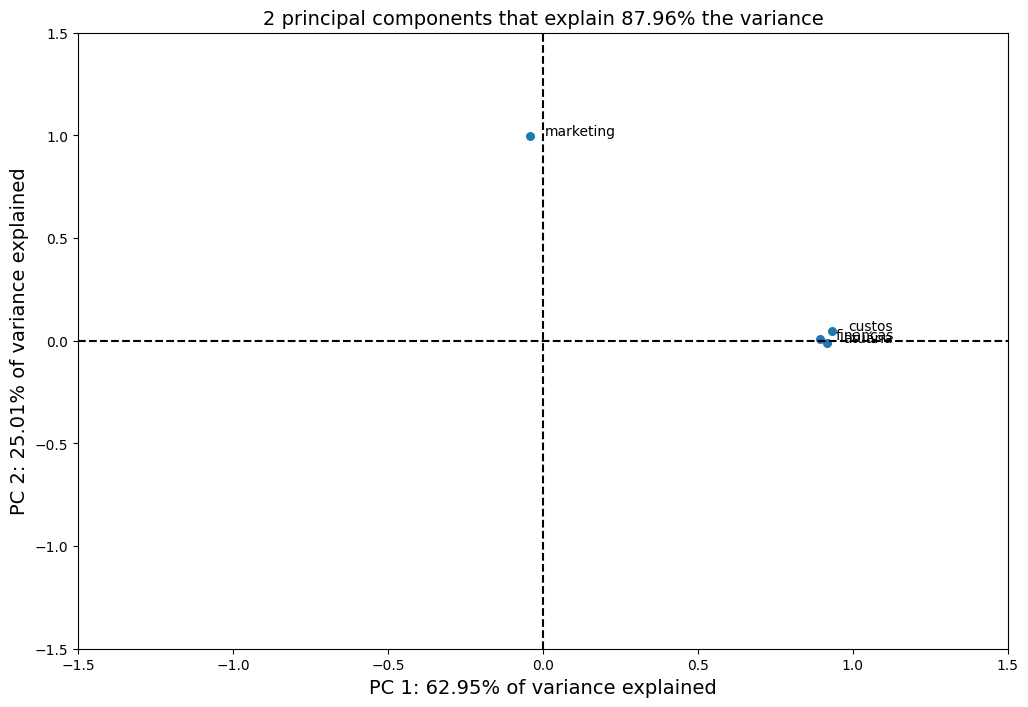

In [28]:
# Graph of loadings and variances
import matplotlib.pyplot as plt

plt.figure(figsize=(12,8))

table_loadings_chart = table_loadings.reset_index()

plt.scatter(table_loadings_chart['Factor 1'], table_loadings_chart['Factor 2'], s=30)

def label_point(x, y, val, ax):
    a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
    for i, point in a.iterrows():
        ax.text(point['x'] + 0.05, point['y'], point['val'])

label_point(x = table_loadings_chart['Factor 1'],
            y = table_loadings_chart['Factor 2'],
            val = table_loadings_chart['index'],
            ax = plt.gca())

plt.axhline(y=0, color='black', ls='--')
plt.axvline(x=0, color='black', ls='--')
plt.ylim([-1.5,1.5])
plt.xlim([-1.5,1.5])
plt.title(f"{table_eigen.shape[0]} principal components that explain {round(table_eigen['Variance'].sum()*100,2)}% the variance", fontsize=14)
plt.xlabel(f"PC 1: {round(table_eigen.iloc[0]['Variance']*100,2)}% of variance explained", fontsize=14)
plt.ylabel(f"PC 2: {round(table_eigen.iloc[1]['Variance']*100,2)}% of variance explained", fontsize=14)
plt.show()




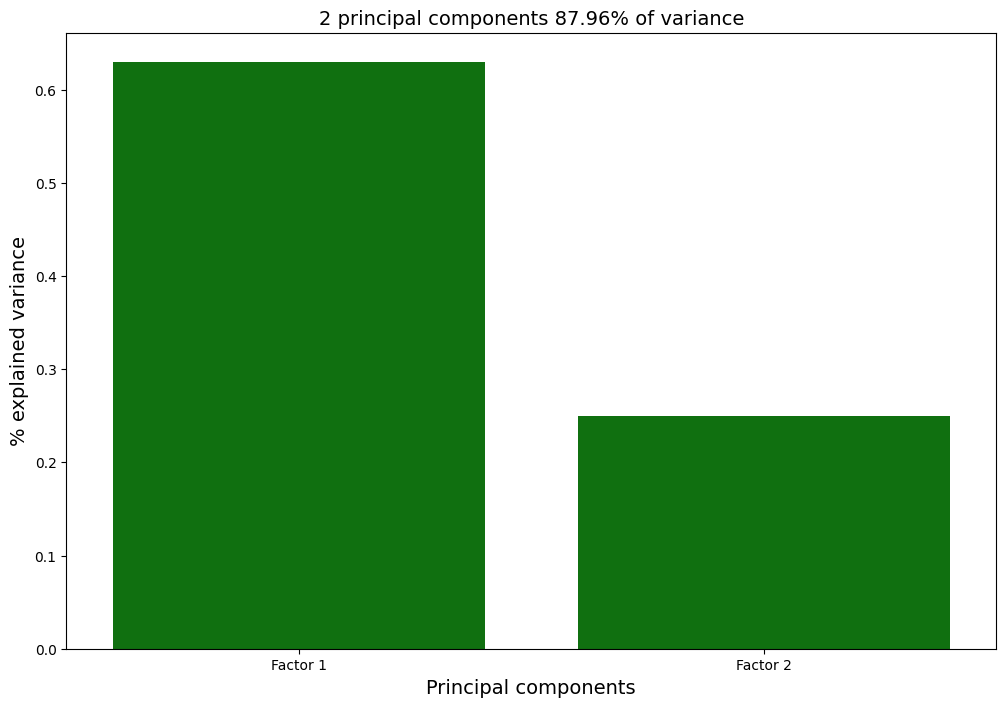

In [29]:
# Cummulative variance
plt.figure(figsize=(12,8))

plt.title(f"{table_eigen.shape[0]} principal components {round(table_eigen['Variance'].sum()*100,2)}% of variance", fontsize=14)
sns.barplot(x=table_eigen.index, y=table_eigen['Variance'], data=table_eigen, color='green')
plt.xlabel("Principal components", fontsize=14)
plt.ylabel("% explained variance", fontsize=14)
plt.show()